## Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz

## Preparing The Data

In [4]:
df = pd.read_csv("/content/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print(df.shape)

(150, 5)


In [6]:
species_mapping = {'Iris-setosa':0, 'Iris-versicolor': 1, 'Iris-virginica': 2  }
df["species"] = df["species"].map(species_mapping)

In [7]:
df["species"].unique()

array([0, 1, 2])

In [8]:
sp1 = df.loc[df["species"]== 0]
sp1.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
sp2 = df.loc[df["species"]== 1]
sp2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [10]:
sp3 = df.loc[df["species"]== 2]
sp3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


### View summary of dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
df.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species
4.9           3.1          1.5           0.1          0          3
5.8           2.7          5.1           1.9          2          2
              4.0          1.2           0.2          0          1
5.9           3.0          4.2           1.5          1          1
6.2           3.4          5.4           2.3          2          1
                                                                ..
5.5           2.3          4.0           1.3          1          1
              2.4          3.7           1.0          1          1
                           3.8           1.1          1          1
              2.5          4.0           1.3          1          1
7.9           3.8          6.4           2.0          2          1
Length: 147, dtype: int64

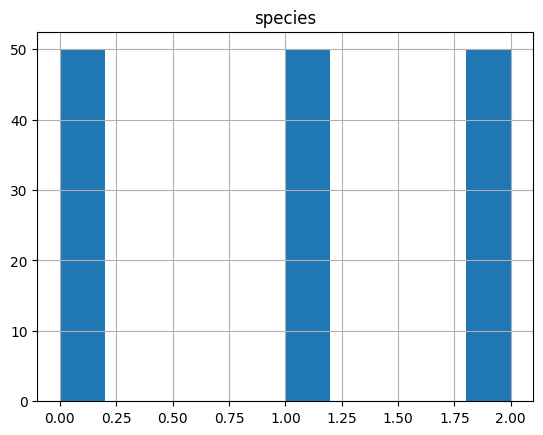

In [13]:
df.hist(column = 'species');

In [14]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Build Machine Learning Model

In [15]:
#Lets create feature matrix X  and y labels
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df[['species']]

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (150, 4)
y shape= (150, 1)


In [16]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (120, 4)
X_test dimension=  (30, 4)
y_train dimension=  (120, 1)
y_train dimension=  (30, 1)


Now lets train the model using Decision Tree

In [17]:
cls = tree.DecisionTreeClassifier(criterion='entropy',  random_state= 2)
cls.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2)

### Testing The Model


In [18]:
y_pred = cls.predict(X_test)
print("10th specie:",y_pred[9])
print("20th specie:",y_pred[19])
print("29th specie:",y_pred[28])

10th specie: 2
20th specie: 1
29th specie: 2


### Model Score

In [19]:
cls.score(X_test,y_test)

0.9

## Visualize The Decision Tree

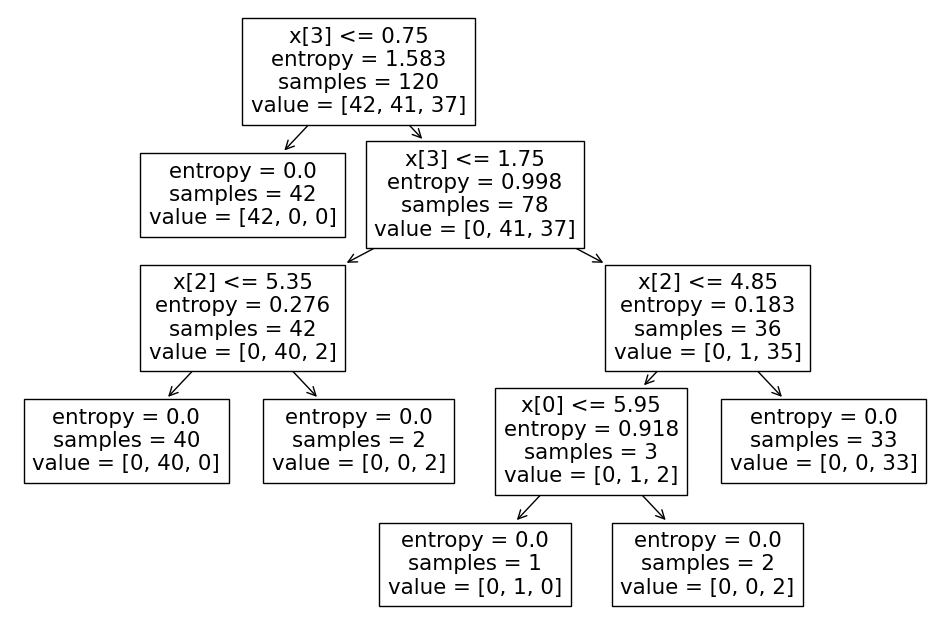

In [20]:
plt.figure(figsize=(12,8))
tree.plot_tree(cls);

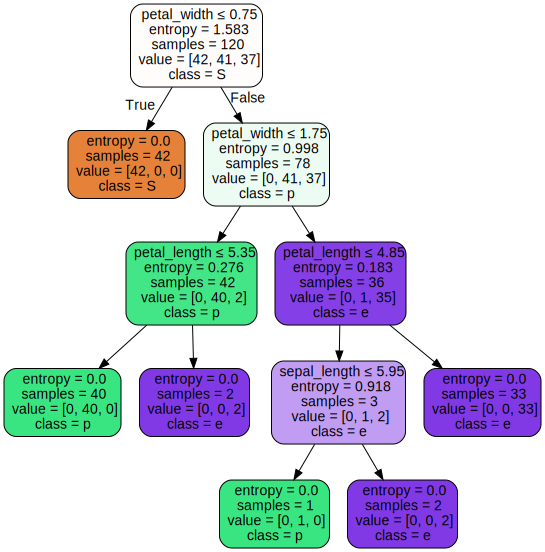

In [21]:
dot_data = tree.export_graphviz(cls, out_file=None,
                      feature_names=X.columns,
                      class_names= "Species",
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph